<a href="https://colab.research.google.com/github/leenago/Self_studying/blob/master/hongong_ML/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%2B_%EB%94%A5%EB%9F%AC%EB%8B%9D_01_%EB%82%98%EC%9D%98_%EC%B2%AB_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. 

In [67]:
import matplotlib.pyplot as plt

## 01-3 마켓과 머신러닝

- 머신러닝에서 여러 개의 종류(= 클래스, class) 중 하나를 구별해 내는 문제를 '분류(classification)'라고 한다. 2개의 클래스 중 하나를 고르는 문제를 '이진 분류(binary classification)'라고 한다.
- Python 프로그램의 'class'와는 다른 개념!

In [68]:
#도미 데이터 준비하기
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

- 특성: 데이터의 특징
  - ex) 각 도미의 특징 (무게, 길이)

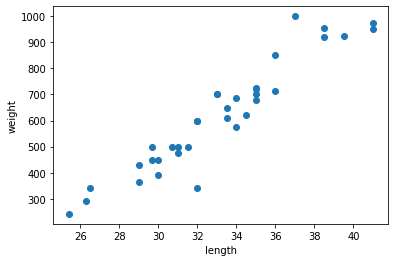

In [69]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length') 
plt.ylabel('weight')
plt.show()

 - 산점도 그래프가 일직선에 가까운 형태로 나타나는 경우를 **선형**적이라고 한다.

In [70]:
#빙어 데이터 준비하기
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

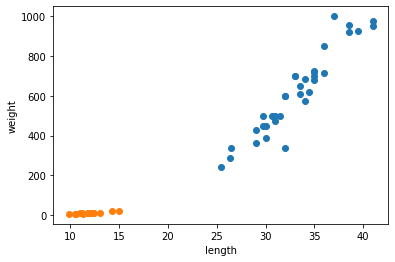

In [71]:
#2개의 산점도를 함께 표현하기
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### k-최근접 이웃 알고리즘
- 어떤 데이터에 대한 답을 구할 때, 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.

---
> *KNeighborsClassifier((n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs))

- **n_neighbors** : *int, optional (default = 5)*
    
    Number of neighbors to use by default for kneighbors queries.


 - **weights** : *str or callable, optional (default = 'uniform')*
    
    weight function used in prediction.  Possible values:

  - 'uniform' : uniform weights.  All points in each neighborhood
  are weighted equally.
- 'distance' : weight points by the inverse of their distance.
  in this case, closer neighbors of a query point will have a
  greater influence than neighbors which are further away.
- [callable] : a user-defined function which accepts an
  array of distances, and returns an array of the same shape
  containing the weights.

- **algorithm** : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
    
    Algorithm used to compute the nearest neighbors:

  - 'ball_tree' will use `BallTree`
  - 'kd_tree' will use `KDTree`
  - 'brute' will use a `brute-force search`.
    - brute-force: A method of computation wherein the computer is let to try all permutations of a problem until one is found that provides a solution, in contrast to the implementation of a more intelligent algorithm.
  - 'auto' will attempt to decide the most appropriate algorithm
    based on the values passed to `fit` method.

    * Note: fitting on sparse input will override the setting of
this parameter, using brute force.


- **leaf_size** : *int, optional (default = 30)*
   
    Leaf size passed to BallTree or KDTree.  This can affect the
    speed of the construction and query, as well as the memory
    required to store the tree.  The optimal value depends on the
    nature of the problem.

- **p** : *integer, optional (default = 2)*

    : Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. (매개변수로 거리를 재는 방법, 1은 맨해튼거리, 2는 유클리디안 거리 사용)

- **metric** : *string or callable, default 'minkowski'*

    the distance metric to use for the tree.  The default metric is
    minkowski, and with p=2 is equivalent to the standard Euclidean
    metric. See the documentation of the DistanceMetric class for a
    list of available metrics.
    If metric is "precomputed", X is assumed to be a distance matrix and
    must be square during fit. X may be a Glossary <sparse graph>,
    in which case only "nonzero" elements may be considered neighbors.

- **metric_params** : *dict, optional (default = None)*

    Additional keyword arguments for the metric function.

- **n_jobs** : *int or None, optional (default=None)*

    : The number of parallel jobs to run for neighbors search.
    None means 1 unless in a joblib.parallel_backend context.
    -1 means using all processors. Doesn't affect fit method.(매개변수로 사용할 CPU 코어를 지정한다.)


---

- 위 알고리즘을 이용하여 도미와 빙어 데이터를 구분해본다.

In [72]:
KNeighborsClassifier

sklearn.neighbors._classification.KNeighborsClassifier

In [73]:
#도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

- 위 데이터의 형식은 이러하다.
  > length = [25.4, 26.3, ... , 9.8, ... , 15.0] / 
  > weight = [242.0, 290.0, ... , 6.7, ... , 19.9]

- 저 형식을 이제 2차원 리스트로 변경해주어야 한다.
  > [[25.4, 242.0] , [26.3, 290.0], ... , [length, weight]]

In [74]:
fish_data = [[l, w] for l, w in zip(length, weight)] ; fish_data[:5]
#for문은 zip()함수로 length와 weight를 하나씩 꺼내서 l과 w에 할당해준다.

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

---
- 2차원 리스트 (리스트의 리스트)가 생성되었으니, 정답데이터를 만들어야 한다.
- 머신러닝에서 2개를 구분하는 경우, **찾는 대상**을 **1**로 설정하고, **그 외에는 0**으로 설정한다.


In [75]:
fish_target = [1] * 35 + [0] * 14 ; fish_target
#도미와 빙어를 순서대로 나열했기 때문에, 앞의 데이터는 도미, 뒤의 데이터는 빙어이다.
#그렇기 때문에 1을 35개, 0을 14개 놓음으로써, 도미와 빙어를 1과 0으로 나누어주었다.

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

- 이제 사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 **KNeighborsClassifier**를 가져온다.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
#import sklearn
#model = sklearn.neighbors.KNeighborsClassifier() 이렇게 불러와도 된다.

In [77]:
#객체(= 모델)를 먼저 만들어준다.
kn = KNeighborsClassifier()

- kn 객체에 fish_data와 fish_target을 전달, 도미를 찾기 위한 기준을 학습시킨다.
- 위와 같이, 모델에 데이터를 전달하여 규칙을 학습하는 과정을 **훈련(training)** 이라고 한다.
- 사이킷런에서는 **fit()** 메서드를 이용하여, 주어진 데이터로 알고리즘을 훈련시킨다.

In [78]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- 객체(=모델)이 얼마나 잘 훈련되었는지 평가해보기 위해, score() 메서드를 사용한다.
- 이 메서드는 0과 1 사이의 값을 반환한다. (= **정확도**)
- 1에 가까워질수록 데이터를 정확히 맞혔다는 뜻이다.   

In [79]:
kn.score(fish_data, fish_target)

1.0

- predict() 메서드는 새로운 데이터의 정답을 예측한다. 
- fit()과 마찬가지로, 리스트의 리스트를 전달해야한다.

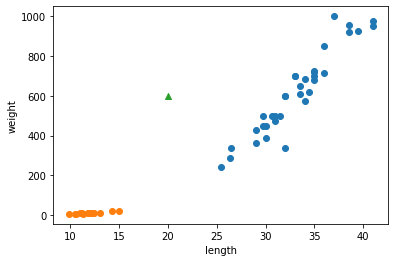

In [80]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(20,600, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [81]:
kn.predict([[20,600]])

array([1])

In [82]:
#리스트를 감싸지 않은 경우
kn.predict([20,600])

ValueError: ignored

---
- 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살펴봐야 한다.
- 단점은, 데이터가 아주 많은 경우, 이 모델을 사용하기 어렵다는 것이다.
  >데이터가 크고, 직선거리 계산에 많은 시간이 소요



- k-최근접 이웃 알고리즘은 fit() 메서드에 전달받은 데이터를 모두 가지고 있다가, 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 도미인지 빙어인지 구분한다.

In [83]:
print(kn._fit_X)
print('-'*8)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
--------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


- KNeighborsClassifier 클래스의 데이터 참고 기본값은 5인데, 이는 설정하기 나름이다. 

In [84]:
#참고 데이터를 49개로 한 kn49 모델
kn49 = KNeighborsClassifier(n_neighbors = 49)

In [85]:
kn49.fit(fish_data, fish_target) 
#앞이 training data, 뒤가 정답 데이터

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [86]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [87]:
#이것은 fish_data의 데이터 49개 중, 도미 35개가 다수를 차지하기 때문에, 어떤 데이터를 넣어도 무조건 도미라고 예측하게 된다.
print(35/49)  #정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)

0.7142857142857143
